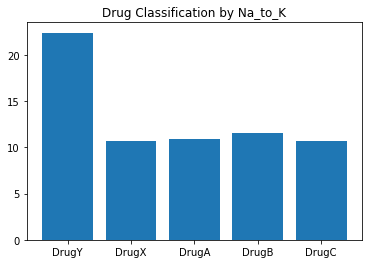

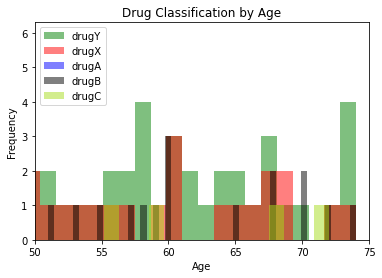

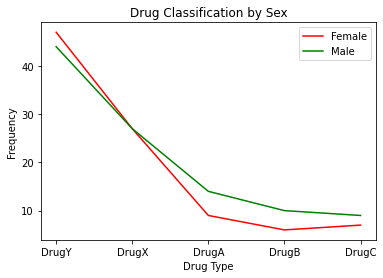

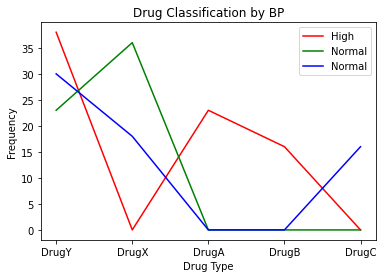

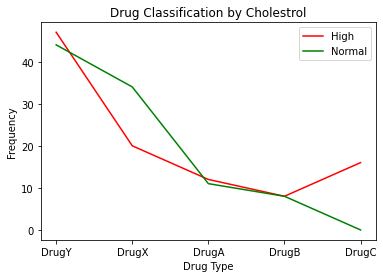

In [17]:
# Task 1, 2 and 3

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

drugList = pd.read_csv("drug200.csv")

## Spliting into 5 groups
drugY = drugList.loc[drugList['Drug'] == "drugY"]
drugX = drugList.loc[drugList['Drug'] == "drugX"]
drugA = drugList.loc[drugList['Drug'] == "drugA"]
drugB = drugList.loc[drugList['Drug'] == "drugB"]
drugC = drugList.loc[drugList['Drug'] == "drugC"]


# Na_To_K
xAxis = ["DrugY", "DrugX", "DrugA", "DrugB", "DrugC"]
yAxis = [drugY['Na_to_K'].mean(), drugX['Na_to_K'].mean(), drugA['Na_to_K'].mean(), drugB['Na_to_K'].mean(), drugC['Na_to_K'].mean()]

fig1 = plt.figure(1)

plt.bar(xAxis, yAxis)

plt.title("Drug Classification by Na_to_K")

fig2 = plt.figure(2)

# Visualize Drug Y by Age
drugY_Age = drugList.loc[drugList['Drug']=='drugY', 'Age']
drugX_Age = drugList.loc[drugList['Drug']=='drugX', 'Age']
drugA_Age = drugList.loc[drugList['Drug']=='drugA', 'Age']
drugB_Age = drugList.loc[drugList['Drug']=='drugB', 'Age']
drugC_Age = drugList.loc[drugList['Drug']=='drugC', 'Age']

kwargs = dict(alpha=0.5, bins=50)

plt.hist(drugY_Age, **kwargs, color='g', label='drugY')
plt.hist(drugX_Age, **kwargs, color='r', label='drugX')
plt.hist(drugA_Age, **kwargs, color='b', label='drugA')
plt.hist(drugB_Age, **kwargs, color='k', label='drugB')
plt.hist(drugC_Age, **kwargs, color='#a7dd1c', label='drugC')
plt.xlim(50,75)
plt.legend()

plt.title("Drug Classification by Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Sex
fig3 = plt.figure(3)

yAxis = [len(drugY[drugY.Sex == 'F']), len(drugX[drugX.Sex == 'F']), len(drugA[drugA.Sex == 'F']), len(drugB[drugB.Sex == 'F']), len(drugC[drugC.Sex == 'F'])]

plt.plot(xAxis, yAxis, color = 'r', label = 'Female')

yAxis = [len(drugY[drugY.Sex == 'M']), len(drugX[drugX.Sex == 'M']), len(drugA[drugA.Sex == 'M']), len(drugB[drugB.Sex == 'M']), len(drugC[drugC.Sex == 'M'])]

plt.plot(xAxis, yAxis, color='g', label = 'Male')

plt.title("Drug Classification by Sex")
plt.xlabel("Drug Type")
plt.ylabel("Frequency")
plt.legend()

# BP
fig4 = plt.figure(4)

yAxis = [len(drugY[drugY.BP == 'HIGH']), len(drugX[drugX.BP == 'HIGH']), len(drugA[drugA.BP == 'HIGH']), len(drugB[drugB.BP == 'HIGH']), len(drugC[drugC.BP == 'HIGH'])]

plt.plot(xAxis, yAxis, color = 'r', label = 'High')

yAxis = [len(drugY[drugY.BP == 'NORMAL']), len(drugX[drugX.BP == 'NORMAL']), len(drugA[drugA.BP == 'NORMAL']), len(drugB[drugB.BP == 'NORMAL']), len(drugC[drugC.BP == 'NORMAL'])]

plt.plot(xAxis, yAxis, color='g', label = 'Normal')

yAxis = [len(drugY[drugY.BP == 'LOW']), len(drugX[drugX.BP == 'LOW']), len(drugA[drugA.BP == 'LOW']), len(drugB[drugB.BP == 'LOW']), len(drugC[drugC.BP == 'LOW'])]

plt.plot(xAxis, yAxis, color='b', label = 'Normal')

plt.title("Drug Classification by BP")
plt.xlabel("Drug Type")
plt.ylabel("Frequency")
plt.legend()

# Cholestrol 
fig5 = plt.figure(5)

yAxis = [len(drugY[drugY.Cholesterol == 'HIGH']), len(drugX[drugX.Cholesterol == 'HIGH']), len(drugA[drugA.Cholesterol == 'HIGH']), len(drugB[drugB.Cholesterol == 'HIGH']), len(drugC[drugC.Cholesterol == 'HIGH'])]

plt.plot(xAxis, yAxis, color = 'r', label = 'High')

yAxis = [len(drugY[drugY.Cholesterol == 'NORMAL']), len(drugX[drugX.Cholesterol == 'NORMAL']), len(drugA[drugA.Cholesterol == 'NORMAL']), len(drugB[drugB.Cholesterol == 'NORMAL']), len(drugC[drugC.Cholesterol == 'NORMAL'])]

plt.plot(xAxis, yAxis, color='g', label = 'Normal')

plt.title("Drug Classification by Cholestrol")
plt.xlabel("Drug Type")
plt.ylabel("Frequency")
plt.legend()

## Saving
pdf = PdfPages("drugClassification.pdf")
fig_nums = plt.get_fignums()
figs = [plt.figure(n) for n in fig_nums]
for fig in figs:
    fig.savefig(pdf, format='pdf')
pdf.close()

In [2]:
# Task 4 and 5
import sklearn.model_selection as model_selection

drugList = pd.read_csv("drug200.csv")
drugList.BP = pd.get_dummies(drugList.BP, ['LOW', 'NORMAL', 'HIGH'])
drugList.Cholesterol = pd.get_dummies(drugList.Cholesterol, ['NORMAL', 'HIGH'])
drugList.Sex = pd.get_dummies(drugList.Sex, ['F', 'M'])

# X = data, Y = labels of data
X = drugList[['Age','Sex','BP','Cholesterol','Na_to_K']]
Y = drugList['Drug']

# Use X_train and Y_train to train, then test model on X_test and Y_test
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y)

In [3]:
# Task 6
# a) Gaussian NB

import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score

accu = []
avg = []
weighted = []

for i in range(10):
  GaussB = GaussianNB()
  GaussB.fit(X_train, Y_train)

  Y_expect = Y_test
  Y_predict = GaussB.predict(X_test)

  acc = accuracy_score(Y_test, Y_predict) * 100
  f1_avg = f1_score(Y_test, Y_predict, average='macro')
  f1_weighted = f1_score(Y_test, Y_predict, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)

  report = classification_report(Y_test, Y_predict)

  confusion_matrix(Y_test, Y_predict)

print(accu)
print(avg)
print(weighted)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))

[66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0]
[0.6802614379084967, 0.6802614379084967, 0.6802614379084967, 0.6802614379084967, 0.6802614379084967, 0.6802614379084967, 0.6802614379084967, 0.6802614379084967, 0.6802614379084967, 0.6802614379084967]
[0.6761830065359478, 0.6761830065359478, 0.6761830065359478, 0.6761830065359478, 0.6761830065359478, 0.6761830065359478, 0.6761830065359478, 0.6761830065359478, 0.6761830065359478, 0.6761830065359478]
Accuracy Average:  66.0
Accuracy Standard deviation:  0.0
F1 Macro Average:  0.6802614379084967
F1 Macro Standard deviation:  0.0
F1 Weighted Average:  0.6761830065359478
F1 Weighted Standard deviation:  0.0


In [4]:
 # Task 6
# b) Base-Decision-Tree

from sklearn.tree import DecisionTreeClassifier

accu = []
avg = []
weighted = []

for i in range(10):
  DTClassifier = DecisionTreeClassifier()
  DTClassifier.fit(X_train, Y_train)

  Y_predicted = DTClassifier.predict(X_test)

  acc = accuracy_score(Y_test, Y_predicted) * 100
  f1_avg = f1_score(Y_test, Y_predicted, average='macro')
  f1_weighted = f1_score(Y_test, Y_predicted, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)

  report = classification_report(Y_test, Y_predicted)

  confusion_matrix(Y_test, Y_predicted)

print(accu)
print(avg)
print(weighted)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))

[96.0, 94.0, 94.0, 94.0, 92.0, 92.0, 96.0, 96.0, 96.0, 92.0]
[0.9433333333333334, 0.8920634920634921, 0.9193675889328065, 0.9093333333333333, 0.8692307692307694, 0.8866666666666667, 0.9433333333333334, 0.9433333333333334, 0.9433333333333334, 0.8866666666666667]
[0.9623333333333334, 0.9368253968253968, 0.9442687747035573, 0.9421333333333333, 0.92, 0.9246666666666666, 0.9623333333333334, 0.9623333333333334, 0.9623333333333334, 0.9246666666666666]
Accuracy Average:  94.2
Accuracy Standard deviation:  1.6613247725836147
F1 Macro Average:  0.9136661850227068
F1 Macro Standard deviation:  0.027333073132115627
F1 Weighted Average:  0.9441894171528954
F1 Weighted Standard deviation:  0.016500523708114962


In [5]:
# Task 6
# c) Top-Decision-Tree

from sklearn.model_selection import GridSearchCV
accu = []
avg = []
weighted = []

for i in range(10):
  DTClassifier = DecisionTreeClassifier()

  params = {
      "criterion": ["gini", "entropy"],
      "max_depth": [5,15],
      "min_samples_split": [2,7,15]
  }

  clf = GridSearchCV(DTClassifier, params)
  clf.fit(X_train, Y_train)
  print("Best parameters: ", clf.best_params_)

  Y_predicted = clf.predict(X_test)

  acc = accuracy_score(Y_test, Y_predicted) * 100
  f1_avg = f1_score(Y_test, Y_predicted, average='macro')
  f1_weighted = f1_score(Y_test, Y_predicted, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)

  report = classification_report(Y_test, Y_predicted)

  confusion_matrix(Y_test, Y_predicted)

print(accu)
print(avg)
print(weighted)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))

Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 15}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 15}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 15}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 15}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 15}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 15}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 15}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 15}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 15}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 15}
[88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0]
[0.8300000000000001, 0.8300000000000001, 0.8300000000000001, 0.8300000000000001, 0.8300000000000001, 0.8300000000000001, 0.830000

In [6]:
# Task 6
# d) Perceptron

from sklearn.linear_model import Perceptron
print("Training Perceptron:\n")

accu = []
avg = []
weighted = []

for i in range(10):
  clf = Perceptron()
  clf.fit(X_train, Y_train)
  Y_predicted = clf.predict(X_test)

  report = classification_report(Y_test, Y_predicted)

  acc = accuracy_score(Y_test, Y_predicted) * 100
  f1_avg = f1_score(Y_test, Y_predicted, average='macro')
  f1_weighted = f1_score(Y_test, Y_predicted, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)

  confusion_matrix(Y_test, Y_predicted)

print(accu)
print(avg)
print(weighted)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))

Training Perceptron:

[52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0]
[0.2435897435897436, 0.2435897435897436, 0.2435897435897436, 0.2435897435897436, 0.2435897435897436, 0.2435897435897436, 0.2435897435897436, 0.2435897435897436, 0.2435897435897436, 0.2435897435897436]
[0.47461538461538466, 0.47461538461538466, 0.47461538461538466, 0.47461538461538466, 0.47461538461538466, 0.47461538461538466, 0.47461538461538466, 0.47461538461538466, 0.47461538461538466, 0.47461538461538466]
Accuracy Average:  52.0
Accuracy Standard deviation:  0.0
F1 Macro Average:  0.2435897435897436
F1 Macro Standard deviation:  0.0
F1 Weighted Average:  0.4746153846153847
F1 Weighted Standard deviation:  5.551115123125783e-17


F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\skle

In [7]:
# Task 6
# e) Base-MLP
from sklearn.neural_network import MLPClassifier

accu = []
avg = []
weighted = []

for i in range(10):
  clf = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', solver='sgd').fit(X_train, Y_train)
  Y_predicted = clf.predict(X_test)

  report = classification_report(Y_test, Y_predicted)

  acc = accuracy_score(Y_test, Y_predicted) * 100
  f1_avg = f1_score(Y_test, Y_predicted, average='macro')
  f1_weighted = f1_score(Y_test, Y_predicted, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)

  confusion_matrix(Y_test, Y_predicted)

print(accu)
print(avg)
print(weighted)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))

F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score 

[66.0, 64.0, 66.0, 64.0, 66.0, 64.0, 66.0, 66.0, 66.0, 64.0]
[0.29333333333333333, 0.28045397225725094, 0.29333333333333333, 0.28045397225725094, 0.29333333333333333, 0.28045397225725094, 0.29333333333333333, 0.29333333333333333, 0.29333333333333333, 0.28045397225725094]
[0.5573333333333333, 0.5377049180327869, 0.5573333333333333, 0.5377049180327869, 0.5573333333333333, 0.5377049180327869, 0.5573333333333333, 0.5573333333333333, 0.5573333333333333, 0.5377049180327869]
Accuracy Average:  65.2
Accuracy Standard deviation:  0.9797958971132712
F1 Macro Average:  0.28818158890290035
F1 Macro Standard deviation:  0.00630957256989295
F1 Weighted Average:  0.5494819672131147
F1 Weighted Standard deviation:  0.009615920389155402


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score 

In [8]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier()

params = {
    "activation": ["logistic", "tanh", "relu", "identity"],
    "hidden_layer_sizes": [(30, 50), (10, 10, 10)],
    "solver": ["adam","sgd"]
}

accu = []
avg = []
weighted = []

for i in range(10):
  clf = GridSearchCV(mlp, params)
  clf.fit(X_train, Y_train)
  print("Best parameters: ", clf.best_params_)

  Y_predicted = clf.predict(X_test)

  acc = accuracy_score(Y_test, Y_predicted) * 100
  f1_avg = f1_score(Y_test, Y_predicted, average='macro')
  f1_weighted = f1_score(Y_test, Y_predicted, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)
  report = classification_report(Y_test, Y_predicted)

  confusion_matrix(Y_test, Y_predicted)

print(accu)
print(avg)
print(weighted)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))

F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_netw

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_netw

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_netw

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_netw

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_netw

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_netw

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_netw

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_netw

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_netw

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_netw

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}
[84.0, 84.0, 90.0, 86.0, 78.0, 88.0, 88.0, 82.0, 86.0, 80.0]
[0.6468433527257057, 0.7178649237472767, 0.7655172413793103, 0.7376766091051804, 0.4815686274509804, 0.7421326259946949, 0.676072249589491, 0.7030501089324618, 0.7458461538461538, 0.6074074074074074]
[0.8089808230984701, 0.8202832244008714, 0.8751724137931035, 0.8437205651491365, 0.7370980392156862, 0.8452031830238727, 0.8405701149425288, 0.8010239651416121, 0.8408000000000001, 0.7585185185185185]
Accuracy Average:  84.6
Accuracy Standard deviation:  3.5832945734337835
F1 Macro Average:  0.6823979300178663
F1 Macro Standard deviation:  0.08154937944679147
F1 Weighted Average:  0.81713708472838
F1 Weighted Standard deviation:  0.040187022434049105


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score 